In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
from collections import Counter
import re

%matplotlib inline

In [156]:
!pip install langdetect
from langdetect import detect

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [157]:
data_path = '../scrapers/data.json'
data_path = os.path.abspath(os.path.join(data_path))
data_path

'/home/stanislav/my_projects/JoBERTa/scrapers/data.json'

In [168]:
df = pd.read_json(data_path).drop_duplicates(inplace=False,subset='url')
df['published'] = df['published'].apply(lambda x: int(re.match('\d+',x)[0]))
df = df.sort_values(by='published')
df.shape

(345, 5)

In [169]:
df.head(10)

,title,published,easy_apply,url,description
187,Data Analyst,1,False,https://www.glassdoor.com/job-listing/data-ana...,A well-funded & successful startup that has de...
79,Data Product Scientist לחברת סטארטאפ בתל אביב,1,False,https://www.glassdoor.com/job-listing/data-pro...,"מיקום: ת""א והמרכז\n\nתיאור המשרה:\n\nדרוש/ה Da..."
80,Senior Data Scientist לחברת פינטק מובילה,1,False,https://www.glassdoor.com/job-listing/senior-d...,"מיקום: ת""א והמרכז\n\nתיאור המשרה:\nאחד מהסטארט..."
251,Senior Data Science,1,False,https://www.glassdoor.com/job-listing/senior-d...,"מיקום: ת""א והמרכז\n\nתיאור המשרה:\n\nלכל ה-Dat..."
96,Machine Learning Engineer,1,False,https://www.glassdoor.com/job-listing/machine-...,"Sarona Campus, TLV | Engineering | Full-time\n..."
117,Senior Data Scientist,1,False,https://www.glassdoor.com/job-listing/senior-d...,What's the job?We are looking for an outstandi...
93,Data Engineer,1,False,https://www.glassdoor.com/job-listing/data-eng...,Moon Active is one of the world's fastest-grow...
233,Senior Data analyst לחברה מצליחה העוסקת בתחום ...,1,False,https://www.glassdoor.com/job-listing/senior-d...,"מיקום: ת""א והמרכז\n\nתיאור המשרה:\n\nאנו מחפשי..."
130,Intern - Decision Scientist,1,False,https://www.glassdoor.com/job-listing/intern-d...,"What does Success Look Like?\n\nAs an intern, ..."
163,Data Scientist / Machine Learning Expert,1,False,https://www.glassdoor.com/job-listing/data-sci...,Job Description:\n\nFor a software company wit...


In [170]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 187 to 228
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        339 non-null    object
 1   published    345 non-null    int64 
 2   easy_apply   345 non-null    bool  
 3   url          345 non-null    object
 4   description  345 non-null    object
dtypes: bool(1), int64(1), object(3)
memory usage: 13.8+ KB


In [171]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return None
    
df['language'] = df['description'].apply(lambda x: detect_language(x))
df = df[df['language']=='en']
df.shape

(213, 6)

In [174]:
MOST_COMMON = 30

positions = Counter(df['title'])
positions.most_common(MOST_COMMON)

[('Data Scientist', 45),
 ('Data Engineer', 22),
 ('Data Analyst', 16),
 ('Machine Learning Engineer', 11),
 ('Senior Data Scientist', 11),
 ('Data Engineer Team Leader', 5),
 ('Senior Big Data Engineer', 5),
 ('Lead Data Scientist', 4),
 ('Big Data Engineer', 3),
 ('Senior Applied Scientist, Alexa Shopping', 2),
 ('Marketing Data Analyst', 2),
 ('Cyber Data Scientist', 2),
 ('Senior Data analyst', 2),
 ('Quantitative Researcher', 2),
 ('Senior Data Analyst', 2),
 ('Lead Big Data Engineer', 2),
 ('Senior Data Infrastructure Engineer', 2),
 ('Applied Scientist - Alexa Shopping', 2),
 ('Data Science Team Lead', 2),
 ('Intern - Decision Scientist', 1),
 ('Data Scientist / Machine Learning Expert', 1),
 ('Senior Data Engineer (Tel-Aviv)', 1),
 ('Product Manager, Data & Analytics - TLV', 1),
 ('Internship Opportunities for Students: Data science/Researcher', 1),
 ('Data Engineer!', 1),
 ('Senior Product Manager - Data Science', 1),
 ('Data Engineer / DBA', 1),
 ('Senior Business/Data analys

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

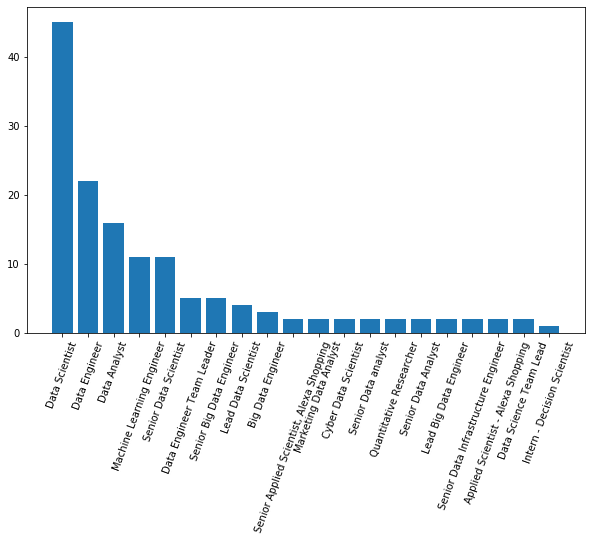

In [173]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x=[_[0] for _ in positions.most_common(MOST_COMMON)],height=[_[1] for _ in positions.most_common(MOST_COMMON)])
plt.xticks(rotation=70)